# How to use Python for Data Analysis (PfDA)


*Reading Assigned a while ago from PfDA*

   * read [`PfDA`, Chap 1  Preliminaries](http://proquest.safaribooksonline.com/book/programming/python/9781449323592/1dot-preliminaries/id2664030), especially the installation instructions for EPD Free for your computer platform.  I want you to try installing EPD Free (or EPD Academic) before class on Thursday.
   * read [`PfDA`, Chap 3](http://proquest.safaribooksonline.com/book/programming/python/9781449323592/3dot-ipython-an-interactive-computing-and-development-environment/id2545624) 
   * skim [`PfDA`, Appendix: Python Language Essentials](http://proquest.safaribooksonline.com/book/programming/python/9781449323592/adot-python-language-essentials/id2819503) -- to help remind yourself of key elements of standard Python 
   * skim [`PfDA`, Chap 2 Introductory Examples](http://proquest.safaribooksonline.com/book/programming/python/9781449323592/2dot-introductory-examples/id423077) 

* Github repo for book: [pydata/pydata-book](https://github.com/pydata/pydata-book)
* [Confirmed Errata | O'Reilly Media Python for Data Analysis](http://www.oreilly.com/catalog/errata.csp?isbn=0636920023784)
* [Unconfirmed Errata | O'Reilly Media Python for Data Analysis](http://www.oreilly.com/catalog/errataunconfirmed.csp?isbn=0636920023784)

I suggest cloning the repo somewhere on your computer

my own setup: I've git cloned 

    https://github.com/pydata/pydata-book.git

into 

    /Users/raymondyee/D/Document/Working_with_Open_Data/pydata-book/
    
and put a symbolic link to /Users/raymondyee/D/Document/Working_with_Open_Data/pydata-book/ in my working-with-open-data-2014 repo parallel to the notebooks directory.

In [1]:
%%bash
# this is what I ran on my mac to make this link
cd ..
ln -s /Users/raymondyee/D/Document/Working_with_Open_Data/pydata-book/ pydata-book

ln: pydata-book/: File exists


In [2]:
%%bash
# in my case, I had been adding other notebooks
ls ../pydata-book/

ch 04_05.ipynb
ch02
ch03
ch06
ch07
ch08
ch09
ch11
ch13
dir_list
dpla.ipynb
dpla.py
groupby_learning.ipynb
groupby_learning.py
numpy_matplotlib_video.ipynb


# Calculate PFDA_PATH (for RY's relative dir setup) or set it manually

In [3]:
#http://stackoverflow.com/a/17295128/7782
import os
PFDA_PATH  = os.path.abspath(os.path.join(os.getcwd(), 
                                          os.path.join(os.path.pardir, "pydata-book")
                                        ))
PFDA_PATH

'/Users/raymondyee/D/Document/Working_with_Open_Data/working-open-data-2014/pydata-book'

In [4]:
assert os.path.exists(PFDA_PATH)

# Chapter 1

In [5]:
# locat the bitly file and make sure it exists
import os

path = os.path.join(PFDA_PATH,'ch02/usagov_bitly_data2012-03-16-1331923249.txt')
print "bit.ly data file exists: ", os.path.exists(path)

bit.ly data file exists:  True


In [6]:
# let's try some of the code from PfDA
# read a line
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [7]:
import json
records = [json.loads(line) for line in open(path)]
time_zones = [rec.get('tz') for rec in records]

In [8]:
time_zones

[u'America/New_York',
 u'America/Denver',
 u'America/New_York',
 u'America/Sao_Paulo',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Warsaw',
 u'',
 u'',
 u'',
 u'America/Los_Angeles',
 u'America/New_York',
 u'America/New_York',
 None,
 u'America/New_York',
 u'Asia/Hong_Kong',
 u'Asia/Hong_Kong',
 u'America/New_York',
 u'America/Denver',
 u'Europe/Rome',
 u'Africa/Ceuta',
 u'America/New_York',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Madrid',
 u'Asia/Kuala_Lumpur',
 u'Asia/Nicosia',
 u'America/Sao_Paulo',
 u'',
 u'',
 u'Europe/London',
 u'America/New_York',
 u'Pacific/Honolulu',
 u'America/Chicago',
 u'',
 u'',
 u'Pacific/Honolulu',
 u'',
 u'America/New_York',
 u'America/New_York',
 u'America/New_York',
 u'America/Chicago',
 u'Europe/Rome',
 u'America/New_York',
 u'America/New_York',
 u'America/Los_Angeles',
 u'',
 u'',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Malta',
 u'America/New_York',
 u'America/New_York',
 u'',
 u'America/Los_Angeles',
 None,
 u'

## Jumping to "Counting Time Zones with pandas" (p.21) 

In [9]:
from pandas import DataFrame, Series
import pandas as pd

In [10]:
frame = DataFrame(records)  # records is a list of dicts

In [11]:
frame['tz'].value_counts()

America/New_York                  1251
                                   521
America/Chicago                    400
America/Los_Angeles                382
America/Denver                     191
Europe/London                       74
Asia/Tokyo                          37
Pacific/Honolulu                    36
Europe/Madrid                       35
America/Sao_Paulo                   33
Europe/Berlin                       28
Europe/Rome                         27
America/Rainy_River                 25
Europe/Amsterdam                    22
America/Indianapolis                20
America/Phoenix                     20
Europe/Warsaw                       16
America/Mexico_City                 15
Europe/Stockholm                    14
Europe/Paris                        14
America/Vancouver                   12
Pacific/Auckland                    11
Europe/Prague                       10
Europe/Helsinki                     10
Asia/Hong_Kong                      10
America/Puerto_Rico      

In [12]:
# fill missing


clean_tz = frame['tz'].fillna('Missing')
clean_tz.value_counts()

America/New_York                  1251
                                   521
America/Chicago                    400
America/Los_Angeles                382
America/Denver                     191
Missing                            120
Europe/London                       74
Asia/Tokyo                          37
Pacific/Honolulu                    36
Europe/Madrid                       35
America/Sao_Paulo                   33
Europe/Berlin                       28
Europe/Rome                         27
America/Rainy_River                 25
Europe/Amsterdam                    22
America/Phoenix                     20
America/Indianapolis                20
Europe/Warsaw                       16
America/Mexico_City                 15
Europe/Paris                        14
Europe/Stockholm                    14
America/Vancouver                   12
Pacific/Auckland                    11
Europe/Prague                       10
Europe/Helsinki                     10
Asia/Hong_Kong           

In [13]:
clean_tz[clean_tz==''] = 'Unknown'

In [14]:
clean_tz.value_counts()

America/New_York                  1251
Unknown                            521
America/Chicago                    400
America/Los_Angeles                382
America/Denver                     191
Missing                            120
Europe/London                       74
Asia/Tokyo                          37
Pacific/Honolulu                    36
Europe/Madrid                       35
America/Sao_Paulo                   33
Europe/Berlin                       28
Europe/Rome                         27
America/Rainy_River                 25
Europe/Amsterdam                    22
America/Indianapolis                20
America/Phoenix                     20
Europe/Warsaw                       16
America/Mexico_City                 15
Europe/Stockholm                    14
Europe/Paris                        14
America/Vancouver                   12
Pacific/Auckland                    11
Asia/Hong_Kong                      10
Europe/Prague                       10
Europe/Helsinki          

In [15]:
# let's embed the plot inline
%pylab --no-import-all inline

Populating the interactive namespace from numpy and matplotlib


In [16]:
tz_counts = clean_tz.value_counts()

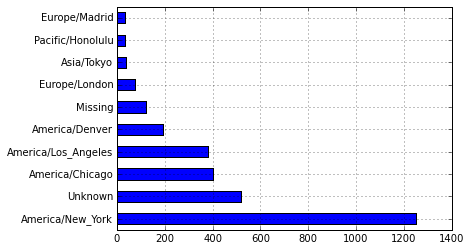

In [17]:
tz_counts[:10].plot(kind='barh', rot=0)

And so on....